In [1]:
import mesa
from mesa_restaurant_agents.model.restaurant_model import RestaurantModel

import seaborn as sns
import numpy as np
from mesa_restaurant_agents.agents.customer_agent import CustomerAgent
from mesa_restaurant_agents.agents.manager_agent import ManagerAgent
from mesa_restaurant_agents.agents.waiter_agent import WaiterAgent
from mesa_restaurant_agents.utils.environment_definition import EnvironmentDefinition

In [2]:
params = {"n_waiters":2, "grid_width":50, "grid_height": 50}

results = mesa.batch_run(
    RestaurantModel,
    parameters=params,
    iterations=5,
    max_steps=10,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
print(results)

  0%|          | 0/5 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_waiters': 2, 'grid_width': 50, 'grid_height': 50, 'Customer_Count': 2, 'Average_Wait_Time': np.float64(0.0), 'Average_Customer_Satisfaction': np.float64(100.0), 'Profit': np.float64(0.0), 'Customer_Info': [{'customer_nr': 4, 'waiting_time': 0, 'order_status': 1, 'satisfaction': 100}, {'customer_nr': 5, 'waiting_time': 0, 'order_status': 1, 'satisfaction': 100}], 'Waiter_Info': [{'waiter_nr': 1, 'tips': 0, 'avg_rating': 0, 'served_customers': 0}, {'waiter_nr': 2, 'tips': 0, 'avg_rating': 0, 'served_customers': 0}], 'Environment': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(51, 51)), 'Grid': <mesa.space.MultiGrid object at 0x00000205FF27BA70>}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_waiters': 2, 'grid_width': 50, 'grid_height': 50, 'Custome

In [14]:
def visualize_grid(grid, environment, ax):
    agents_position = np.zeros((grid.width, grid.height))
    for cell_content, (x, y) in grid.coord_iter():
        if len(cell_content) > 0:
            if isinstance(cell_content[0], CustomerAgent):
                agents_position[x][y] = EnvironmentDefinition.OCCUPIED_TABLE.value
            elif isinstance(cell_content[0], WaiterAgent):
                agents_position[x][y] = EnvironmentDefinition.OCCUPIED.value
            else:
                agents_position[x][y] = 5

    for x in range(len(environment)):
        for y in range(len(environment[x])):
            if environment[x][y] == EnvironmentDefinition.FREE_TABLE.value:
                agents_position[x][y] = EnvironmentDefinition.FREE_TABLE.value
            elif environment[x][y] == EnvironmentDefinition.KITCHEN.value:
                agents_position[x][y] = EnvironmentDefinition.KITCHEN.value

    mapping = {0: "", EnvironmentDefinition.FREE_TABLE.value: "",
            EnvironmentDefinition.KITCHEN.value: "",
            EnvironmentDefinition.OCCUPIED_TABLE.value: "C",
            EnvironmentDefinition.OCCUPIED.value: "W", 5: "M"}

    annot = np.vectorize(mapping.get)(agents_position)
        
    # Plot using seaborn, with a visual size of 5x5
    sns.heatmap(agents_position, ax=ax, cmap="viridis", annot=annot, cbar=False, square=True, fmt="")
    #g.figure.set_size_inches(5, 5)
    #g.set(title="Visualization of agents in grid")

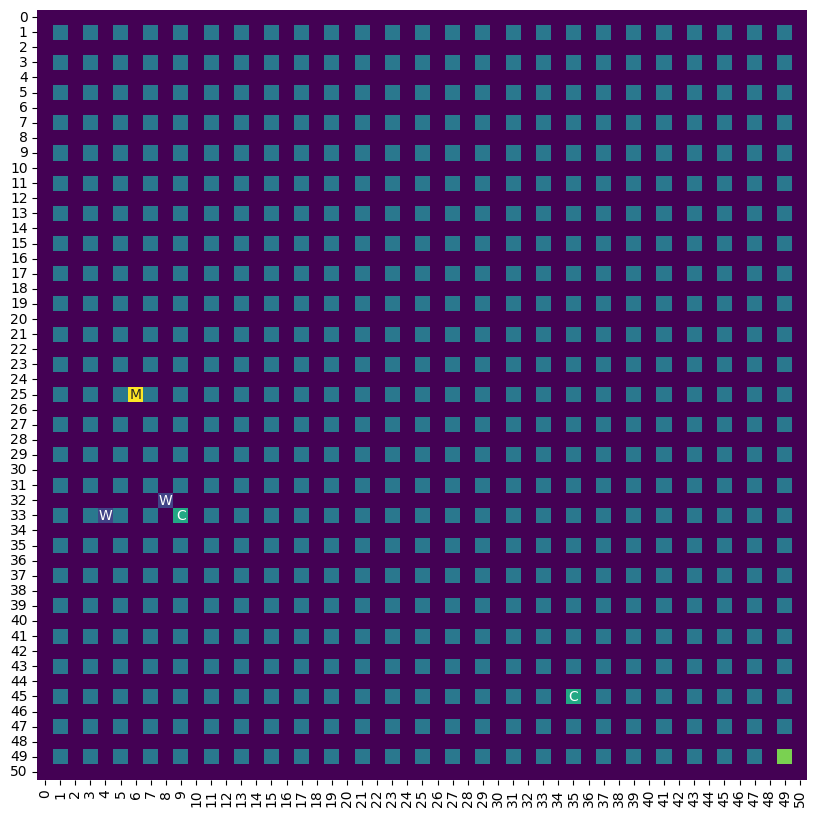

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

df = pd.DataFrame(results)
data_first_run = df[df["RunId"]==0]
grids = list(data_first_run["Grid"])
envs = list(data_first_run["Environment"])

fig, ax = plt.subplots(figsize=(10, 10))  # Reduce the figure size
visualize_grid(grids[0], envs[0], ax)


count = 0
def init():
    global count
    ax.clear()
    visualize_grid(grids[count], envs[count], ax)
    count += 1

# Define the animate function
def animate(i):
    global count
    ax.clear()
    visualize_grid(grids[count], envs[count], ax)
    count += 1
    return ax

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(grids)-1, repeat=False)
plt.show()

# Save the animation as a GIF with optimized parameters
ani.save('animated_heatmap.gif', writer='pillow', fps=2, dpi=80)